# 01 Comparing Q3 LR and SR consensus peak calls

first, sort the consensus peaks bed files

` sort -k 1,1 -k2,2n consensus_regions.bed > consensus_regions.sort.bed`

In [1]:
import pandas as pd
import numpy as np
import pyranges as pr
import os

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

# Comparing cell type annotations of LR and SR Q3 data

In [ ]:
import pickle
import pycisTopic
file_path = "/preprocessing/shortread/atac/outs/cistopic_obj.pkl"
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)
cistopic_obj

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-24 14:23:34,630	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [ ]:
cistopic_obj.cell_data.unique_fragments_count.mean()

7600.014231499052

In [ ]:
umap_coords = cistopic_obj.projections['cell']['UMAP']
cell_type = pd.DataFrame(cistopic_obj.cell_data[['sample_id','cell_type_all']])
combined_df = pd.concat([umap_coords, cell_type], axis=1)
combined_df.to_csv('short_atac_umap_coords.csv')

In [ ]:
combined_df

,UMAP_1,UMAP_2,sample_id,cell_type_all
ACGCAAGCAGGAATCG-1-Q3___Q3,13.803342,-0.719541,Q3,Tem_Trm_cytotoxic_T_cells
AACTACTCAAGTCGCT-1-Q3___Q3,15.714161,16.591734,Q3,Tcm_Naive_helper_T_cells
AGCCAGTGTCATAACG-1-Q3___Q3,7.679672,-0.511736,Q3,Classical_monocytes
AGACAATAGTAACCAC-1-Q3___Q3,14.738013,12.592967,Q3,Pro-B_cells_Q3
CGATGTCCACGTAATT-1-Q3___Q3,3.850441,5.907581,Q3,Pro-B_cells_Q3
...,...,...,...,...
TATAGCTCATTGCGAC-1-Q3___Q3,4.906090,7.199184,Q3,Pro-B_cells_Q3
AAACGCGCAACAACAA-1-Q3___Q3,7.988506,-1.363110,Q3,Classical_monocytes
CGAGGAAGTGTGAGAG-1-Q3___Q3,12.806028,-4.235970,Q3,Tem_Trm_cytotoxic_T_cells
AGCCGGTTCGTTACTT-1-Q3___Q3,4.644050,8.951694,Q3,Pro-B_cells_Q3


In [ ]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,cell_type,sample,pycisTopic_leiden_10_0.2,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,is_nan,cell_type_all
ACGCAAGCAGGAATCG-1-Q3___Q3,20049,4.302093,14510,4.161667,Q3,190,55419,4.743667,30767,4.488099,...,Tem_Trm_cytotoxic_T_cells,Q3,4,3,5,13,11,15,False,Tem_Trm_cytotoxic_T_cells
AACTACTCAAGTCGCT-1-Q3___Q3,6785,3.83155,5660,3.752816,Q3,692,18389,4.264582,10676,4.028449,...,Tcm_Naive_helper_T_cells,Q3,3,4,6,9,1,39,False,Tcm_Naive_helper_T_cells
AGCCAGTGTCATAACG-1-Q3___Q3,9067,3.957464,7922,3.898835,Q3,403,29614,4.471512,16228,4.210292,...,Classical_monocytes,Q3,5,5,9,14,8,55,False,Classical_monocytes
AGACAATAGTAACCAC-1-Q3___Q3,2602,3.415307,2403,3.380754,Q3,1455,7644,3.883377,4261,3.629613,...,Pro-B_cells_Q3,Q3,3,3,10,17,28,20,False,Pro-B_cells_Q3
CGATGTCCACGTAATT-1-Q3___Q3,13796,4.139753,11665,4.066885,Q3,215,48331,4.684235,27219,4.434888,...,Pro-B_cells_Q3,Q3,0,0,3,3,4,4,False,Pro-B_cells_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TATAGCTCATTGCGAC-1-Q3___Q3,1931,3.285782,1811,3.257918,Q3,1936,4791,3.680517,2560,3.408410,...,Pro-B_cells_Q3,Q3,0,0,2,6,10,5,False,Pro-B_cells_Q3
AAACGCGCAACAACAA-1-Q3___Q3,1081,3.033826,1001,3.000434,Q3,2324,2622,3.418798,1519,3.181844,...,Classical_monocytes,Q3,5,5,9,14,8,50,False,Classical_monocytes
CGAGGAAGTGTGAGAG-1-Q3___Q3,1476,3.169086,1377,3.138934,Q3,2156,3512,3.545678,1936,3.287130,...,Tem_Trm_cytotoxic_T_cells,Q3,2,2,1,10,26,32,False,Tem_Trm_cytotoxic_T_cells
AGCCGGTTCGTTACTT-1-Q3___Q3,1291,3.110926,1259,3.100026,Q3,2085,3874,3.588272,2121,3.326745,...,Pro-B_cells_Q3,Q3,0,0,2,1,15,33,False,Pro-B_cells_Q3


In [ ]:
cistopic_obj.cell_data.index = cistopic_obj.cell_data.index.str.replace('-1','')

In [ ]:
file_path = "/preprocessing/atac/Q3_subset/outs/cistopic_obj_all_info.pkl"
with open(file_path, 'rb') as file:
    lr_cistopic_obj = pickle.load(file)
lr_cistopic_obj.cell_data

,cisTopic_nr_frag,total_fragments_in_peaks_count,pdf_values_for_tss_enrichment,cisTopic_log_nr_frag,log10_unique_fragments_in_peaks_count,doublet_outlier,fraction_of_fragments_in_peaks,duplication_count,barcode_rank,duplication_ratio,...,cell_type,sample_id,pycisTopic_leiden_10_0.2,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,cell_type_all,is_nan
CAATTGCGTGTCCTGA-Q3___Q3,8093,11343,0.037338,3.90811,3.883377,False,0.600424,6071,722,0.322891,...,Pro-B_cells_Q3,Q3,1,3,5,6,10,16,Pro-B_cells_Q3,False
AAGGTATGTTAGGTTC-Q3___Q3,9050,12536,0.088176,3.956649,3.930949,False,0.619660,6522,662,0.321503,...,Pro-B_cells_Q3,Q3,1,3,5,6,22,18,Pro-B_cells_Q3,False
CGTAATCGTGCGATTT-Q3___Q3,10870,15205,0.062638,4.03623,4.013974,False,0.606769,8180,494,0.324629,...,Pro-B_cells_Q3,Q3,1,4,7,10,24,14,Pro-B_cells_Q3,False
TGGATTCGTGCAGTAA-Q3___Q3,9479,13269,0.092411,3.976763,3.952599,False,0.609574,7141,613,0.326849,...,Pro-B_cells_Q3,Q3,1,4,7,15,24,42,Pro-B_cells_Q3,False
CAAGGCTCACTAGCTT-Q3___Q3,8877,12402,0.076996,3.948266,3.922310,False,0.435219,9454,425,0.329810,...,Pro-B_cells_Q3,Q3,1,4,10,12,13,36,Pro-B_cells_Q3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3567,0.091211,3.419129,3.393400,False,0.664249,1631,1919,0.304632,...,Tem_Trm_cytotoxic_T_cells,Q3,3,2,0,8,25,26,Tem_Trm_cytotoxic_T_cells,False
CGAGCGAGTATTGAGG-Q3___Q3,1404,1939,0.013062,3.147367,3.126131,False,0.603160,970,2353,0.304553,...,Pro-B_cells_Q3,Q3,2,1,9,5,19,10,Pro-B_cells_Q3,False
GCTATGCTCCACTATG-Q3___Q3,1578,2160,0.002743,3.198107,3.170848,False,0.632906,1043,2306,0.308306,...,Tem_Trm_cytotoxic_T_cells,Q3,3,2,0,8,25,26,Tem_Trm_cytotoxic_T_cells,False
GTTGTCATCATGCCTA-Q3___Q3,1653,2338,0.050342,3.218273,3.186674,False,0.746356,1051,2407,0.338051,...,Pro-B_cells_Q3,Q3,2,1,9,5,19,10,Pro-B_cells_Q3,False


In [ ]:
atac_CB =pd.read_csv('/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz', header = None)
rna_CB = pd.read_csv('/barcodes/cellranger_arc_rna.737K-arc-v1.txt.gz', header = None)
rna_CB.rename(columns={0: 'rna_CB'}, inplace=True)

atac_CB.rename(columns={0: 'atac_CB'}, inplace=True)
df_merged =  pd.concat([rna_CB, atac_CB], axis=1)

In [ ]:
# mappng 
mapping_dict = pd.Series(df_merged['rna_CB'].values, index=df_merged['atac_CB']).to_dict()
lr_cells = lr_cistopic_obj.cell_data
lr_cells['rna_CB'] = lr_cells['barcode'].map(mapping_dict)


In [ ]:
lr_cells

,cisTopic_nr_frag,total_fragments_in_peaks_count,pdf_values_for_tss_enrichment,cisTopic_log_nr_frag,log10_unique_fragments_in_peaks_count,doublet_outlier,fraction_of_fragments_in_peaks,duplication_count,barcode_rank,duplication_ratio,...,sample_id,pycisTopic_leiden_10_0.2,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,cell_type_all,is_nan,rna_CB
CAATTGCGTGTCCTGA-Q3___Q3,8093,11343,0.037338,3.90811,3.883377,False,0.600424,6071,722,0.322891,...,Q3,1,3,5,6,10,16,Pro-B_cells_Q3,False,ATTCAACCAATAGTCT
AAGGTATGTTAGGTTC-Q3___Q3,9050,12536,0.088176,3.956649,3.930949,False,0.619660,6522,662,0.321503,...,Q3,1,3,5,6,22,18,Pro-B_cells_Q3,False,AATTGCTCAGCTTACA
CGTAATCGTGCGATTT-Q3___Q3,10870,15205,0.062638,4.03623,4.013974,False,0.606769,8180,494,0.324629,...,Q3,1,4,7,10,24,14,Pro-B_cells_Q3,False,TCGCTAACAGGAAGCC
TGGATTCGTGCAGTAA-Q3___Q3,9479,13269,0.092411,3.976763,3.952599,False,0.609574,7141,613,0.326849,...,Q3,1,4,7,15,24,42,Pro-B_cells_Q3,False,GTAGTTTCAGTATGTT
CAAGGCTCACTAGCTT-Q3___Q3,8877,12402,0.076996,3.948266,3.922310,False,0.435219,9454,425,0.329810,...,Q3,1,4,10,12,13,36,Pro-B_cells_Q3,False,AAGCGAGGTTGCGCGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3567,0.091211,3.419129,3.393400,False,0.664249,1631,1919,0.304632,...,Q3,3,2,0,8,25,26,Tem_Trm_cytotoxic_T_cells,False,GCCTGCTGTAATAGCT
CGAGCGAGTATTGAGG-Q3___Q3,1404,1939,0.013062,3.147367,3.126131,False,0.603160,970,2353,0.304553,...,Q3,2,1,9,5,19,10,Pro-B_cells_Q3,False,ACGCAAGCACAGCCTG
GCTATGCTCCACTATG-Q3___Q3,1578,2160,0.002743,3.198107,3.170848,False,0.632906,1043,2306,0.308306,...,Q3,3,2,0,8,25,26,Tem_Trm_cytotoxic_T_cells,False,GTCCGTAAGGGTGAAC
GTTGTCATCATGCCTA-Q3___Q3,1653,2338,0.050342,3.218273,3.186674,False,0.746356,1051,2407,0.338051,...,Q3,2,1,9,5,19,10,Pro-B_cells_Q3,False,AGCAGGTAGGTGCGGA


In [ ]:
lr_cells = lr_cells[['rna_CB','barcode','cell_type_all']]

In [ ]:
short_read_data = cistopic_obj.cell_data[['barcode', 'cell_type_all']]

In [ ]:
# keep only first part of before dash in barcode
short_read_data['barcode'] = short_read_data['barcode'].str.split('-').str[0]

In [ ]:
# merge all short read data with filtered cells based on barcode and rna_CB
merged_data = pd.merge(lr_cells, short_read_data, left_on='rna_CB', right_on='barcode', how='outer', indicator = True)

In [ ]:
merged_data

,rna_CB,barcode_x,cell_type_all_x,barcode_y,cell_type_all_y,_merge
0,ATTCAACCAATAGTCT,CAATTGCGTGTCCTGA,Pro-B_cells_Q3,ATTCAACCAATAGTCT,Pro-B_cells_Q3,both
1,AATTGCTCAGCTTACA,AAGGTATGTTAGGTTC,Pro-B_cells_Q3,AATTGCTCAGCTTACA,Pro-B_cells_Q3,both
2,TCGCTAACAGGAAGCC,CGTAATCGTGCGATTT,Pro-B_cells_Q3,TCGCTAACAGGAAGCC,Pro-B_cells_Q3,both
3,GTAGTTTCAGTATGTT,TGGATTCGTGCAGTAA,Pro-B_cells_Q3,GTAGTTTCAGTATGTT,Pro-B_cells_Q3,both
4,AAGCGAGGTTGCGCGA,CAAGGCTCACTAGCTT,Pro-B_cells_Q3,AAGCGAGGTTGCGCGA,Pro-B_cells_Q3,both
...,...,...,...,...,...,...
2182,NaN,NaN,NaN,CTCAATAAGTTGCGTG,Tcm_Naive_helper_T_cells,right_only
2183,NaN,NaN,NaN,CTTCATCCAAGGATTA,Tcm_Naive_helper_T_cells,right_only
2184,NaN,NaN,NaN,ATCACTAAGCCGCTTT,Pro-B_cells_Q3,right_only
2185,NaN,NaN,NaN,AAATCCGGTTCCTGAT,Tcm_Naive_helper_T_cells,right_only


In [ ]:
merged_data._merge.value_counts()

both          1893
right_only     215
left_only       79
Name: _merge, dtype: int64

In [ ]:
merged_data.barcode_y.isna().sum()  # check how many rna_CB are not in short read data

79

In [ ]:
merged_data.barcode_x.isna().sum() 

215

In [ ]:
merged_data.cell_type_all_x = merged_data.cell_type_all_x.replace('_',' ', regex = True)
merged_data.cell_type_all_y = merged_data.cell_type_all_y.replace('_',' ', regex = True)
merged_data.cell_type_all_y = merged_data.cell_type_all_y.replace('_',' ', regex = True)
merged_data.cell_type_all_y = merged_data.cell_type_all_y.replace('Pro-B cells Q3','Tumour (Q3)', regex = True)
merged_data.cell_type_all_x = merged_data.cell_type_all_x.replace('Pro-B cells Q3','Tumour (Q3)', regex = True)

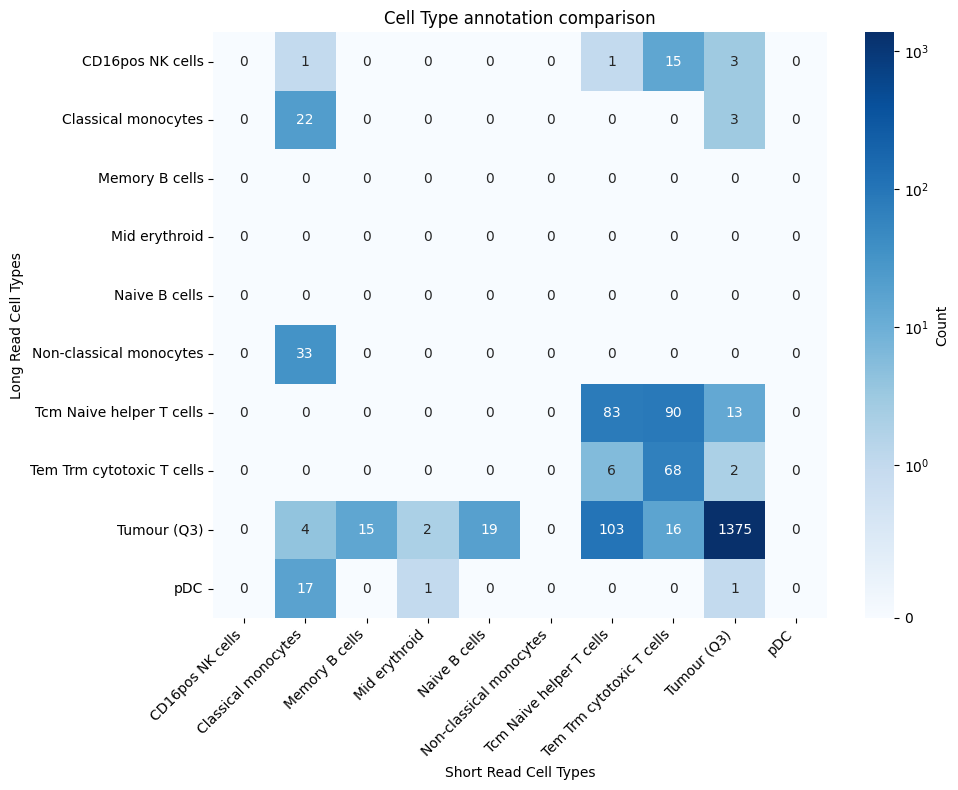

In [ ]:
# heatmap of celll_type_all_x and cell_type_all_y
from matplotlib.colors import SymLogNorm
import seaborn as sns
import matplotlib.pyplot as plt


all_x_categories = set(merged_data['cell_type_all_x'].dropna().unique())
all_y_categories = set(merged_data['cell_type_all_y'].dropna().unique())
all_categories = sorted(all_x_categories.union(all_y_categories))



heatmap_data = merged_data.pivot_table(index='cell_type_all_x', columns='cell_type_all_y', aggfunc='size', fill_value=0)
heatmap_data

heatmap_data = heatmap_data.reindex(index=all_categories, columns=all_categories, fill_value=0)



plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'},  norm=SymLogNorm(linthresh=1, vmin=0))
plt.title('Cell Type annotation comparison')
plt.xlabel('Short Read Cell Types')
plt.ylabel('Long Read Cell Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"figures/confusion_matrix_cell_type_atac.pdf", format="pdf", bbox_inches='tight')
plt.show()  

In [ ]:
heatmap_data 

cell_type_all_y,CD16pos NK cells,Classical monocytes,Memory B cells,Mid erythroid,Naive B cells,Non-classical monocytes,Tcm Naive helper T cells,Tem Trm cytotoxic T cells,Tumour (Q3),pDC
cell_type_all_x,,,,,,,,,,
CD16pos NK cells,0,1,0,0,0,0,1,15,3,0
Classical monocytes,0,22,0,0,0,0,0,0,3,0
Memory B cells,0,0,0,0,0,0,0,0,0,0
Mid erythroid,0,0,0,0,0,0,0,0,0,0
Naive B cells,0,0,0,0,0,0,0,0,0,0
Non-classical monocytes,0,33,0,0,0,0,0,0,0,0
Tcm Naive helper T cells,0,0,0,0,0,0,83,90,13,0
Tem Trm cytotoxic T cells,0,0,0,0,0,0,6,68,2,0
Tumour (Q3),0,4,15,2,19,0,103,16,1375,0
